In [4]:
import matplotlib.pyplot as plt
from full_fft_2d import FullFFT2D
from axis_fft_2d import AxisFFT2D
from tile_fft_2d import TileFFT2D
import cv2
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import numpy as np

In [5]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
corrupted_x, corrupted_y, width, height = 50, 50, 20, 20

In [6]:
full_model = FullFFT2D().fit(img)
reconstructed_full = full_model.predict(corrupted_x, corrupted_y, width, height)
axis_model = AxisFFT2D().fit(img)
reconstructed_axis = axis_model.predict(corrupted_x, corrupted_y, width, height)
tile_model = TileFFT2D().fit(img)
reconstructed_tile = tile_model.predict(corrupted_x, corrupted_y, width, height)

In [13]:
def mse(imageA, imageB):
    return mean_squared_error(imageA, imageB)

def mae(imageA, imageB):
    return np.mean(np.abs(imageA - imageB))

def ssim(imageA, imageB):
    return structural_similarity(imageA, imageB, data_range=imageB.max() - imageB.min())

def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # No error.
    data_range = np.max([imageA.max(), imageB.max()]) - np.min([imageA.min(), imageB.min()])
    return 20 * np.log10(data_range / np.sqrt(mse_value))


In [14]:
metrics = {}
corrupted = img[corrupted_y:corrupted_y+height,corrupted_x:corrupted_x+width]
images = [reconstructed_full,reconstructed_axis,reconstructed_tile]
methods = ['Full','Axis', 'Tile']

for method, image in zip(methods, images):
    metrics[method] = {
        'MSE': mse(corrupted, image),
        'MAE': mae(corrupted, image),
        'SSIM': ssim(corrupted, image),
        'PSNR': psnr(corrupted, image)
    }

# Print metrics for review
for method, scores in metrics.items():
    print(f"{method} Metrics:")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value:.4f}")
    print("\n")

Full Metrics:
  MSE: 912.9225
  MAE: 29.7925
  SSIM: -0.0245
  PSNR: 4.5471


Axis Metrics:
  MSE: 26.1000
  MAE: 4.0450
  SSIM: -0.1018
  PSNR: 14.7768


Tile Metrics:
  MSE: 709.4525
  MAE: 26.1125
  SSIM: 0.0125
  PSNR: 5.2947




C:\Users\Alex\AppData\Local\Temp\ipykernel_20488\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20488\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20488\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20488\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)


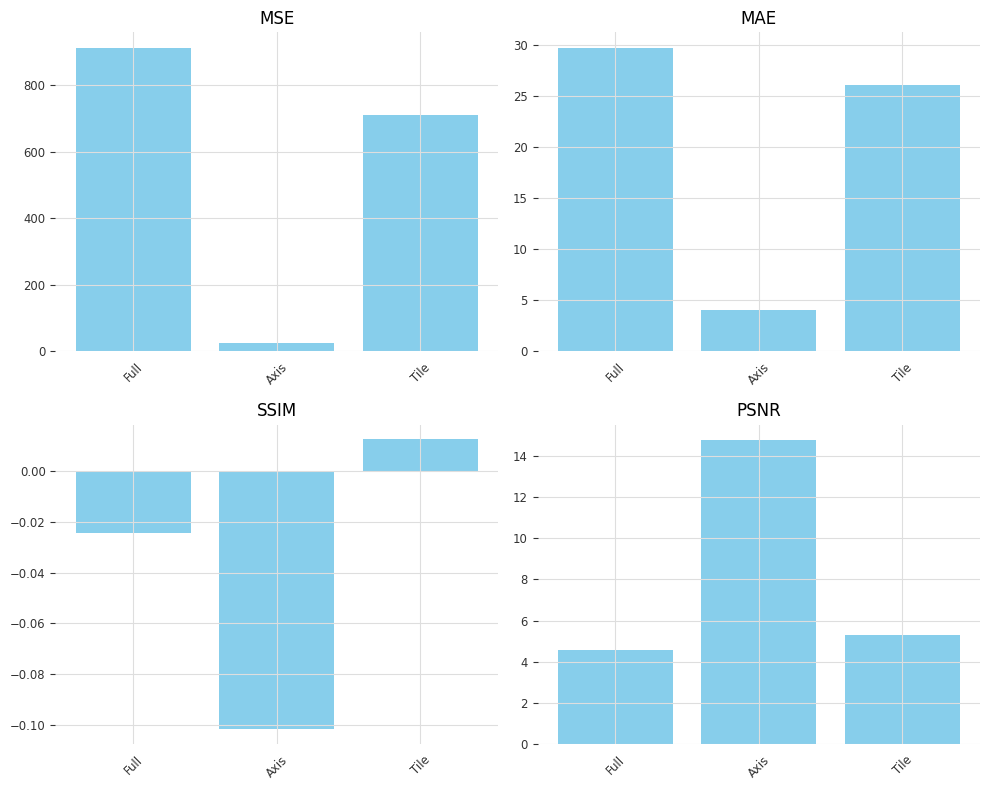

In [15]:
import matplotlib.pyplot as plt

# Setup plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.ravel()
metrics_names = ['MSE', 'MAE', 'SSIM', 'PSNR']

# Plot each metric
for i, metric in enumerate(metrics_names):
    values = [metrics[method][metric] for method in methods]
    axes[i].bar(methods, values, color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_xticklabels(methods, rotation=45)

plt.tight_layout()
plt.show()